# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set the aesthetic style of the plots
sns.set(style="whitegrid")





# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [42]:
# Define the path to the file
file_path = 'Temp_States.csv'

# Import the CSV file into a DataFrame
temp = pd.read_csv(file_path)




#### Print `temp`

In [43]:
# Display the first few rows of the DataFrame to confirm it's loaded correctly
print(temp.head())

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [44]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 300.0+ bytes


#### Select the rows where state is New York

In [45]:
print(temp[temp['State'] == 'New York'])

      City     State  Temperature
0      NYC  New York    19.444444
1   Albany  New York     9.444444
2  Buffalo  New York     3.333333


#### What is the average of the temperature of cities in New York?

In [46]:
new_york_data = temp[temp['State'] == 'New York']
average_temperature = new_york_data['Temperature'].mean()

print(f"The average temperature of cities in New York is {average_temperature:.2f} degrees.")


The average temperature of cities in New York is 10.74 degrees.


#### We want to know cities and states with Temperature above 15 degress Celcius

In [47]:
cities_above_15 = temp[temp['Temperature'] > 15]

print(cities_above_15[['City', 'State']])

       City        State
0       NYC     New York
3  Hartford  Connecticut
5    Treton   New Jersey
6    Newark   New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [48]:
print(cities_above_15[['City']])

       City
0       NYC
3  Hartford
5    Treton
6    Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [49]:
condition = (temp['Temperature'] > 15) & (temp['Temperature'] < 20)

cities_within_range = temp[condition]

print(cities_within_range[['City', 'State']])


       City        State
0       NYC     New York
3  Hartford  Connecticut


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [50]:
# Group the DataFrame by 'state' and calculate the mean and standard deviation for the temperature
state_stats = temp.groupby('State')['Temperature'].agg(['mean', 'std'])

# Rename columns for clarity
state_stats.rename(columns={'mean': 'Average Temperature', 'std': 'Temperature Std Dev'}, inplace=True)

# Display the results
print(state_stats)


             Average Temperature  Temperature Std Dev
State                                                
Connecticut            15.833333             1.964186
New Jersey             21.111111             1.571348
New York               10.740741             8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [51]:
# Define the path to the file
file_path = 'employee.csv'

# Import the CSV file into a DataFrame
employee = pd.read_csv(file_path)

#### Explore the data types of the Temp dataframe. Comment your results

In [52]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 636.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

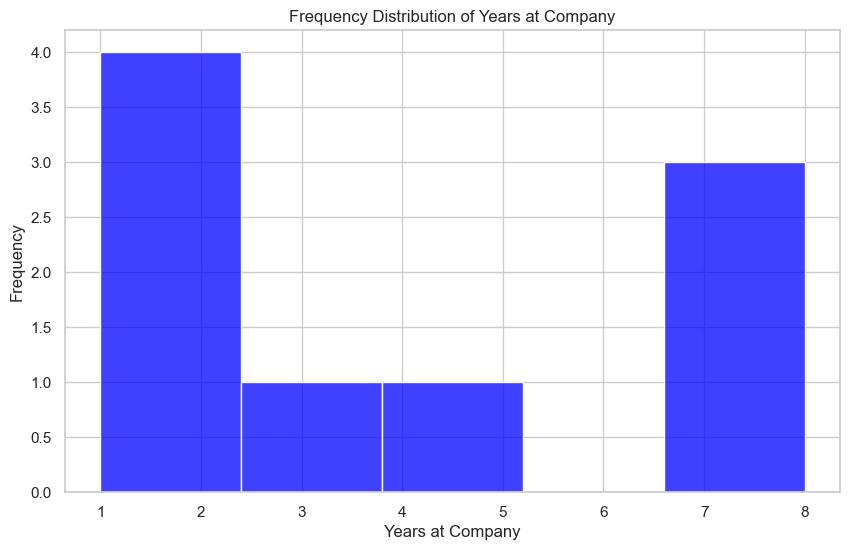

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(employee['Years'], kde=False, color='blue', bins=5)  # Fewer bins due to less data
plt.title('Frequency Distribution of Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Frequency')
plt.show()



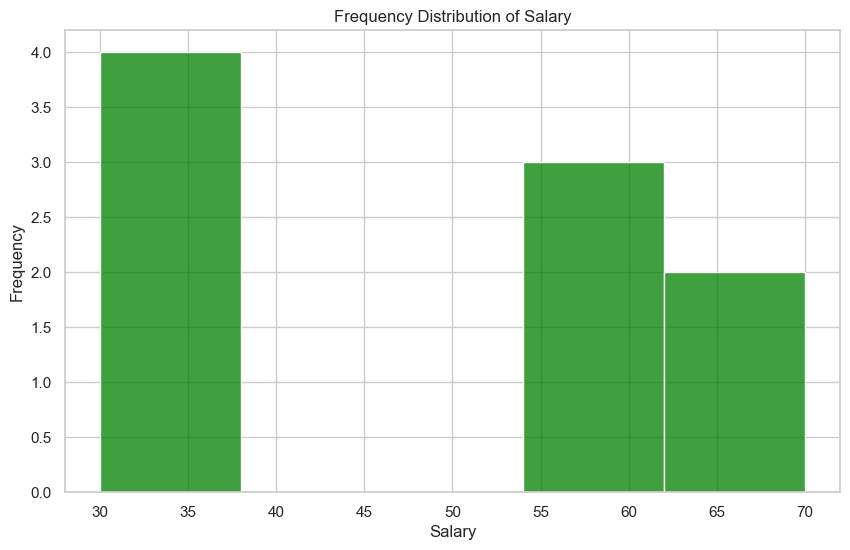

In [54]:

plt.figure(figsize=(10, 6))
sns.histplot(employee['Salary'], kde=False, color='green', bins=5)  # Fewer bins due to less data
plt.title('Frequency Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

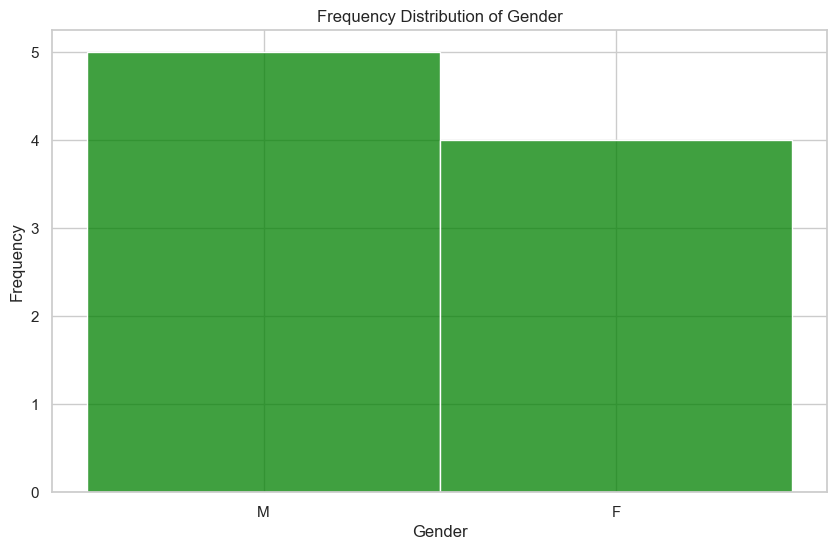

In [55]:
# Plotting the histogram for the 'Salary' column
plt.figure(figsize=(10, 6))
sns.histplot(employee['Gender'], kde=False, color='green', bins=5)  # Fewer bins due to less data
plt.title('Frequency Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

#### What's the average salary in this company?

In [56]:
average_salary = employee['Salary'].mean()


print(f"The average salary in the company is ${average_salary:.2f}")


The average salary in the company is $48.89


#### What's the highest salary?

In [57]:

max_salary = employee['Salary'].max()


print(f"The max salary in the company is ${max_salary:.2f}")


The max salary in the company is $70.00


#### What's the lowest salary?

In [58]:

min_salary = employee['Salary'].min()


print(f"The min salary in the company is ${min_salary:.2f}")

The min salary in the company is $30.00


#### Who are the employees with the lowest salary?

In [59]:

lowest_salary_employees = employee[employee['Salary'] == min_salary]

# Display the employees with the lowest salary
print("Employees with the lowest salary:")
print(lowest_salary_employees[['Name', 'Salary']])


Employees with the lowest salary:
    Name  Salary
1  Maria      30
2  David      30


#### Could you give all the information about an employee called David?

In [60]:
david_info = employee[employee['Name'] == 'David']

print("Information for employee named David:")
print(david_info)

Information for employee named David:
    Name Department Education Gender    Title  Years  Salary
2  David         HR    Master      M  analyst      2      30


#### Could you give only David's salary?

In [61]:
david_info = employee[employee['Name'] == 'David']

# Display all information about David
print("Information for employee named David:")
print(david_info['Salary'])

Information for employee named David:
2    30
Name: Salary, dtype: int64


#### Print all the rows where job title is associate

In [62]:
associates = employee[employee['Title'] == 'associate']

print("Information for eassociates:")
print(associates)

Information for eassociates:
     Name Department Education Gender      Title  Years  Salary
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
7   Pedro         IT       Phd      M  associate      7      60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [63]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [64]:
associates_over55 = employee[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]

print("Information for eassociates over 55:")
print(associates_over55)

Information for eassociates over 55:
    Name Department Education Gender      Title  Years  Salary
7  Pedro         IT       Phd      M  associate      7      60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [66]:
grouped = employee.groupby('Years')['Salary'].mean()

print(grouped)

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64


####  What is the average Salary per title?

In [68]:
grouped_title = employee.groupby('Title')['Salary'].mean()

print(grouped_title)

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.

* Hint : Quantiles vs Quartiles*
In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.

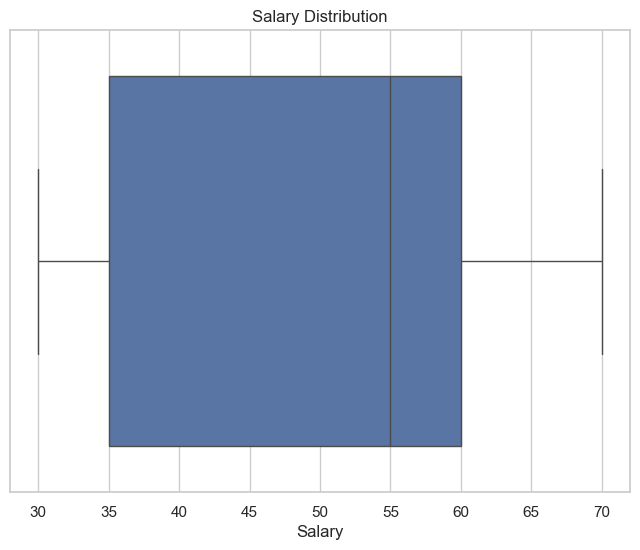

In [72]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=employee['Salary'])
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.show()



In [71]:
# Calculating the first and third quartiles
Q1 = employee['Salary'].quantile(0.25)
Q3 = employee['Salary'].quantile(0.75)

print(f"First Quartile (Q1): {Q1}")
print(f"Third Quartile (Q3): {Q3}")

First Quartile (Q1): 35.0
Third Quartile (Q3): 60.0


In [ ]:
# print third quartile here

#### Is the mean salary per gender different?

In [73]:
grouped_gender = employee.groupby('Gender')['Salary'].mean()

print(grouped_gender)

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [74]:
department_stats = employee.groupby('Department').agg({
    'Years': ['min', 'mean', 'max'],
    'Salary': ['min', 'mean', 'max']
})
print(department_stats)

           Years               Salary           
             min      mean max    min   mean max
Department                                      
HR             2  4.666667   8     30  45.00  70
IT             1  4.500000   8     30  48.75  70
Sales          2  2.500000   3     55  55.00  55


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [75]:
salary_range = employee.groupby('Department')['Salary'].agg(salary_diff=lambda x: x.max() - x.min())

print(salary_range)


            salary_diff
Department             
HR                   40
IT                   40
Sales                 0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [76]:
# Define the path to the file
file_path = 'Orders.csv'

# Import the CSV file into a DataFrame
orders = pd.read_csv(file_path)

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [77]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [78]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [79]:
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [81]:
average_purchase_price = orders['amount_spent'].mean()

print(f"The average purchase price is: {average_purchase_price:.2f}")

The average purchase price is: 22.39


#### What were the highest and lowest purchase prices? 

In [83]:
max_purchase_price = orders['amount_spent'].max()

print(f"The max purchase price is: {max_purchase_price:.2f}")

The max purchase price is: 168469.60


In [84]:
min_purchase_price = orders['amount_spent'].min()

print(f"The max purchase price is: {min_purchase_price:.2f}")

The max purchase price is: 0.00


#### Select all the customers we have in Spain

In [89]:
spain_customers = orders[orders['Country'] == 'Spain']
unique_spanish_customers = spain_customers['CustomerID'].nunique()
print(f"Number of unique customers in Spain: {unique_spanish_customers}")
print(spain_customers)

Number of unique customers in Spain: 30
        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
4250          6421     536944     22383  2010     12    5    12   
4251          6422     536944     22384  2010     12    5    12   
4252          6423     536944     20727  2010     12    5    12   
4253          6424     536944     20725  2010     12    5    12   
4254          6425     536944     20728  2010     12    5    12   
...            ...        ...       ...   ...    ...  ...   ...   
394733      535271     581193     23291  2011     12    3    17   
394734      535272     581193    85232D  2011     12    3    17   
394735      535273     581193     22721  2011     12    3    17   
394736      535274     581193     23241  2011     12    3    17   
394737      535275     581193     23247  2011     12    3    17   

                          Description  Quantity          InvoiceDate  \
4250          lunch bag suki  design         70  2010-12-03 12:20:00   
4251       

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [90]:
customer_frequencies = spain_customers['CustomerID'].value_counts()
print(customer_frequencies)

CustomerID
12540    478
12484    346
12539    273
17097    211
12597    206
12502    147
12556    121
12546     69
12462     62
12354     58
12550     57
12541     52
12545     50
12455     48
12421     45
12510     33
12557     33
12596     27
12417     23
12507     22
12448     22
12538     21
12544     19
12454     15
12442     12
12551     10
12450      8
12547      8
12548      5
12445      4
Name: count, dtype: int64


#### Select all the customers who have bought more than 50 items ?

In [92]:
customer_purchases = orders.groupby('CustomerID')['Quantity'].sum()

# Filtering customers who have bought more than 50 items
customers_over_50_items = customer_purchases[customer_purchases > 50]

# Displaying the results
print(customers_over_50_items)

# If you need the details of these customers from the original DataFrame:
detailed_customers_over_50_items = orders[orders['CustomerID'].isin(customers_over_50_items.index)]
print(detailed_customers_over_50_items.head())

CustomerID
12346    74215
12347     2458
12348     2341
12349      631
12350      197
         ...  
18278       66
18281       54
18282      103
18283     1397
18287     1586
Name: Quantity, Length: 4091, dtype: int64
   Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
0           0     536365    85123A  2010     12    3     8   
1           1     536365     71053  2010     12    3     8   
2           2     536365    84406B  2010     12    3     8   
3           3     536365    84029G  2010     12    3     8   
4           4     536365    84029E  2010     12    3     8   

                           Description  Quantity          InvoiceDate  \
0   white hanging heart t-light holder         6  2010-12-01 08:26:00   
1                  white metal lantern         6  2010-12-01 08:26:00   
2       cream cupid hearts coat hanger         8  2010-12-01 08:26:00   
3  knitted union flag hot water bottle         6  2010-12-01 08:26:00   
4       red woolly hottie white heart.     

#### Select orders from Spain that are above 50 items

In [93]:
spain_orders = orders[orders['Country'] == 'Spain']

# Step 2: Group by 'InvoiceNo' and sum the 'Quantity'
order_quantities = spain_orders.groupby('InvoiceNo')['Quantity'].sum()

# Step 3: Filter orders where the total quantity is greater than 50
large_orders = order_quantities[order_quantities > 50]

# Displaying the results
print("Orders from Spain with more than 50 items:")
print(large_orders)

# If you need the detailed orders from the original DataFrame:
detailed_large_orders = spain_orders[spain_orders['InvoiceNo'].isin(large_orders.index)]
print(detailed_large_orders.head())

Orders from Spain with more than 50 items:
InvoiceNo
536944    400
538095     67
538525    300
539351    100
540469    630
         ... 
578321    920
578339     77
579503    117
580955    182
581193     92
Name: Quantity, Length: 80, dtype: int64
      Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
4250        6421     536944     22383  2010     12    5    12   
4251        6422     536944     22384  2010     12    5    12   
4252        6423     536944     20727  2010     12    5    12   
4253        6424     536944     20725  2010     12    5    12   
4254        6425     536944     20728  2010     12    5    12   

                  Description  Quantity          InvoiceDate  UnitPrice  \
4250  lunch bag suki  design         70  2010-12-03 12:20:00       1.65   
4251  lunch bag pink polkadot       100  2010-12-03 12:20:00       1.45   
4252  lunch bag  black skull.        60  2010-12-03 12:20:00       1.65   
4253  lunch bag red retrospot        70  2010-12-03 12:20:00 

#### Select all free orders

In [94]:
free_items = orders[orders['UnitPrice'] == 0]

print(free_items)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
6914          9302     537197     22841  2010     12    7    14   
22539        33576     539263     22580  2010     12    4    14   
25379        40089     539722     22423  2010     12    2    13   
29080        47068     540372     22090  2011      1    4    16   
29082        47070     540372     22553  2011      1    4    16   
34494        56674     541109     22168  2011      1    4    15   
53788        86789     543599    84535B  2011      2    4    13   
85671       130188     547417     22062  2011      3    3    10   
92875       139453     548318     22055  2011      3    3    12   
97430       145208     548871     22162  2011      4    1    14   
107192      157042     550188     22636  2011      4    4    18   
128641      187613     553000     47566  2011      5    4    15   
137127      198383     554037     22619  2011      5    5    14   
194648      279324     561284     22167  2011      7    2    1

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [96]:
lunch_bag_orders = orders[orders['Description'].str.contains('lunch bag', case=False, na=False)]

print(f"Total orders containing 'lunch bag': {lunch_bag_orders.shape[0]}")

Total orders containing 'lunch bag': 11556


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [98]:
orders_2011 = orders[orders['year'] == 2011]

lunch_bag_orders_2011 = orders_2011[orders_2011['Description'].str.contains('lunch bag', case=False, na=False)]

print(f"Total 'lunch bag' orders made in 2011: {lunch_bag_orders_2011.shape[0]}")

Total 'lunch bag' orders made in 2011: 11234


#### Show the frequency distribution of the amount spent in Spain.

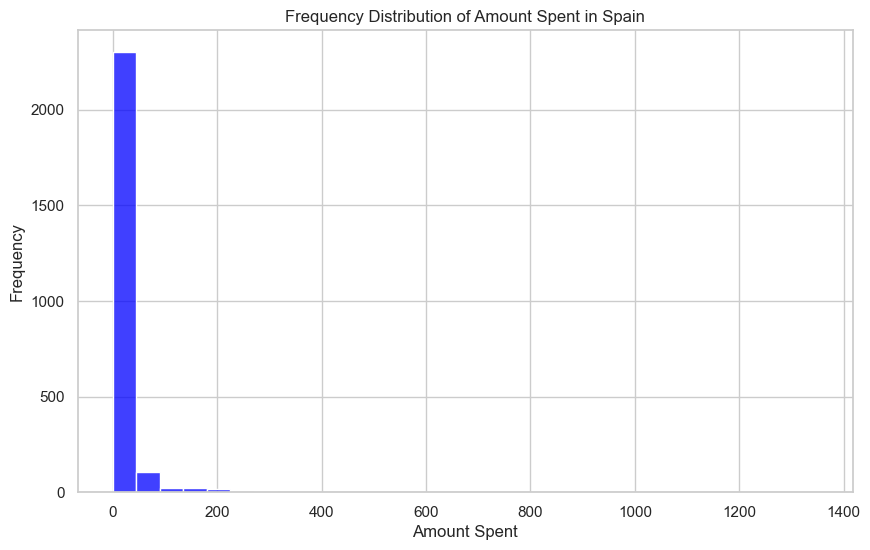

In [100]:
spain_orders = orders[orders['Country'] == 'Spain']

# Plotting the histogram for the amount spent
plt.figure(figsize=(10, 6))
sns.histplot(spain_orders['amount_spent'], bins=30, kde=False, color='blue')
plt.title('Frequency Distribution of Amount Spent in Spain')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Select all orders made in the month of August

In [ ]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [101]:
august_orders = orders[orders['month'] == 8]

print(f"Total orders made in August: {august_orders.shape[0]}")

Total orders made in August: 27013


#### What's the  average amount of money spent by country

In [103]:
average_amount_spent_by_country = orders.groupby('Country')['amount_spent'].mean().reset_index()

average_amount_spent_by_country.columns = ['Country', 'Average_Amount_Spent']

average_amount_spent_by_country.head()

,Country,Average_Amount_Spent
0,Australia,116.895620
1,Austria,25.624824
2,Bahrain,32.258824
3,Belgium,20.283772
4,Brazil,35.737500


#### What's the most expensive item?

In [106]:
most_expensive_item = orders.loc[orders['UnitPrice'].idxmax()]


print("The most expensive item is:")
print(most_expensive_item)

The most expensive item is:
Unnamed: 0                   173382
InvoiceNo                    551697
StockCode                      POST
year                           2011
month                             5
day                               2
hour                             13
Description                 postage
Quantity                          1
InvoiceDate     2011-05-03 13:46:00
UnitPrice                   8142.75
CustomerID                    16029
Country              United Kingdom
amount_spent                8142.75
Name: 118352, dtype: object


#### What was the average amount spent per year ?

In [105]:
average_amount_spent_year = orders.groupby('year')['amount_spent'].mean().reset_index()

average_amount_spent_year.columns = ['year', 'Average_Amount_Spent']

average_amount_spent_year.head()

,year,Average_Amount_Spent
0,2010,21.892733
1,2011,22.430074
